In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import backtrader
import backtrader.feeds as btfeeds

from strategies import MAstrategy

In [3]:
%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = 30, 10

In [4]:
def quick_clean(df):
    """convert all columns to their proper dtype"""

    df['open_time'] = pd.to_datetime(df['open_time'], unit='ms')
    df = df.set_index('open_time', drop=True)

    df = df.astype(dtype={
        'open': 'float64',
        'high': 'float64',
        'low': 'float64',
        'close': 'float64',
        'volume': 'float64',
        'close_time': 'datetime64[ms]',
        'quote_asset_volume': 'float64',
        'number_of_trades': 'int64',
        'taker_buy_base_asset_volume': 'float64',
        'taker_buy_quote_asset_volume': 'float64',
        'ignore': 'float64'
    })
    
    return df

In [5]:
# _df = pd.read_parquet("ETH-USDT.parquet")

# # Write the DataFrame to a CSV file
# _df.to_csv('ETH-USDT.csv')

In [6]:
df = pd.read_csv('ETH-USDT.csv', parse_dates = True, index_col=0)

perid_from_2020 = 60 * 24 * 100

df = df.iloc[-perid_from_2020:]

df = df.drop(columns=['quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume'])


# window of minutes times hours times days
window = 60 * 24 * 20

print(df)


                        open     high      low    close     volume
open_time                                                         
2022-08-08 22:44:00  1769.69  1769.69  1762.57  1763.66  1750.5801
2022-08-08 22:45:00  1763.67  1763.67  1757.99  1762.43  2375.2605
2022-08-08 22:46:00  1762.42  1769.18  1761.85  1767.29   581.2607
2022-08-08 22:47:00  1767.29  1767.46  1764.87  1766.65   393.4271
2022-08-08 22:48:00  1766.65  1771.51  1766.34  1770.95  1727.4275
...                      ...      ...      ...      ...        ...
2022-11-16 22:39:00  1205.72  1206.15  1205.71  1206.14    51.2300
2022-11-16 22:40:00  1206.15  1206.57  1206.14  1206.36    92.4299
2022-11-16 22:41:00  1206.35  1206.36  1205.54  1205.54   129.3771
2022-11-16 22:42:00  1205.55  1205.55  1204.64  1205.16   111.5082
2022-11-16 22:43:00  1205.15  1206.50  1205.15  1206.50   143.3013

[144000 rows x 5 columns]


In [7]:
cerebro = backtrader.Cerebro()
cerebro.broker.set_cash(1000)





data = btfeeds.PandasData(dataname=df)

cerebro.adddata(data)
cerebro.addstrategy(MAstrategy)



Starting Portfolio Value: 1000.00


0

open_time
2022-08-08 22:44:00            NaN
2022-08-08 22:45:00            NaN
2022-08-08 22:46:00            NaN
2022-08-08 22:47:00            NaN
2022-08-08 22:48:00            NaN
                          ...     
2022-11-16 22:39:00    1443.523611
2022-11-16 22:40:00    1443.512780
2022-11-16 22:41:00    1443.502031
2022-11-16 22:42:00    1443.491349
2022-11-16 22:43:00    1443.480609
Name: open, Length: 144000, dtype: float64


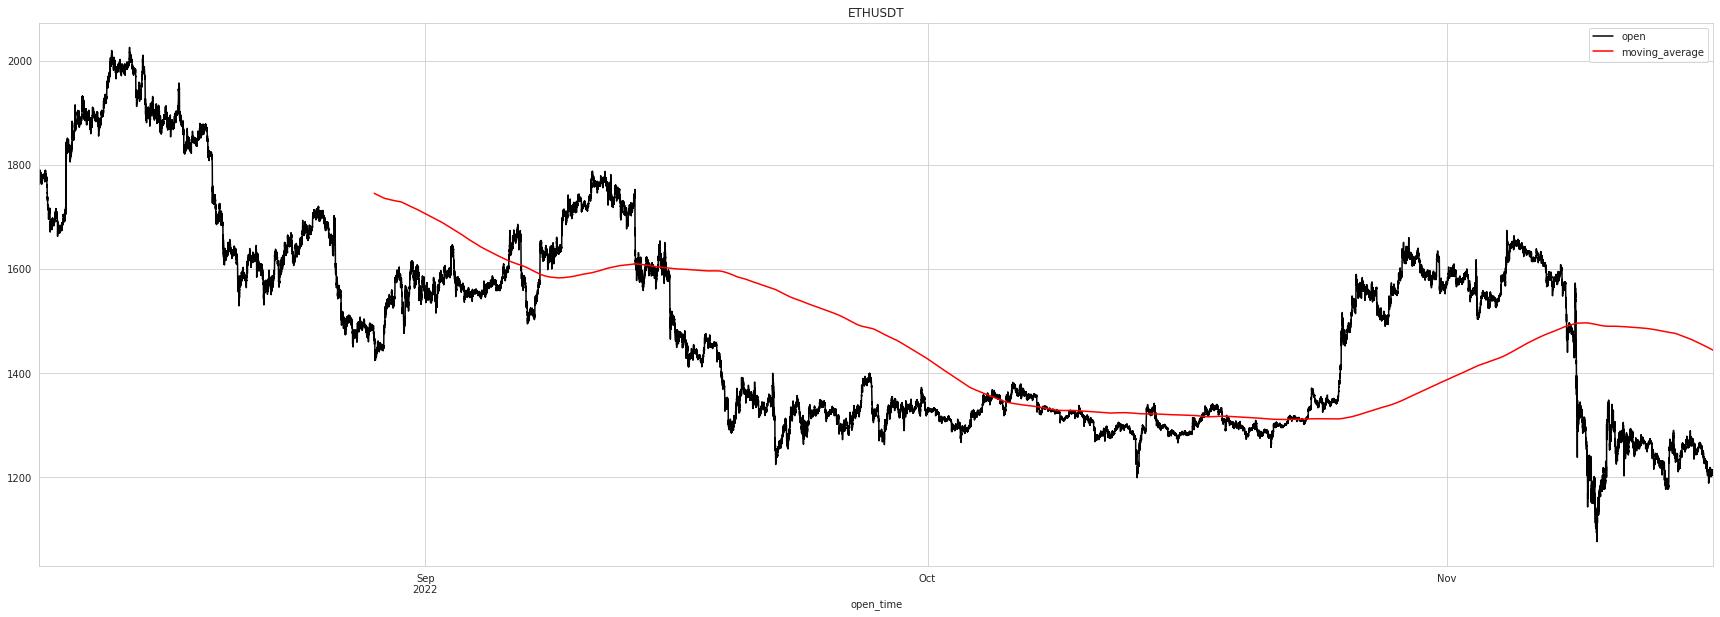

In [8]:
df['moving_average'] = df['open'].rolling(window).mean()
df[['open', 'moving_average']].plot(title='ETHUSDT', color=['black', 'red', 'green'])

print(df['open'].rolling(window).mean())

In [9]:
# ax = df['volume'].plot(title='ETHUSDT', color='black', legend=True)
# df['number_of_trades'].plot(title='ETHUSDT', color='gold', legend=True, ax=ax)

In [12]:
print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

cerebro.run()

print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())

Starting Portfolio Value: 5616.80
2022-08-09, Sell Create, 1778.11
2022-08-09, Executed SELL (Price: 1778.11, Value: -17781.10, Commission 0.00)
2022-08-09, Position Closed, 1776.77
2022-08-09, Executed BUY (Price: 1776.77, Value: -17781.10, Commission 0.00)
2022-08-09, Buy Create, 1778.65
2022-08-09, Order was canceled/margin/rejected
2022-08-09, Sell Create, 1777.79
2022-08-09, Executed SELL (Price: 1777.80, Value: -17778.00, Commission 0.00)
2022-08-09, Position Closed, 1775.41
2022-08-09, Executed BUY (Price: 1775.41, Value: -17778.00, Commission 0.00)
2022-08-09, Buy Create, 1770.70
2022-08-09, Order was canceled/margin/rejected
2022-08-09, Sell Create, 1770.00
2022-08-09, Executed SELL (Price: 1770.00, Value: -17700.00, Commission 0.00)
2022-08-09, Position Closed, 1770.86
2022-08-09, Executed BUY (Price: 1770.87, Value: -17700.00, Commission 0.00)
2022-08-09, Sell Create, 1776.50
2022-08-09, Executed SELL (Price: 1776.51, Value: -17765.10, Commission 0.00)
2022-08-09, Position C